# 决策树

## ID3

In [ ]:
from sklearn import tree 
import numpy as np

In [ ]:
data = np.array([[1,1], [1, 0], [0,1], [0, 0]])

In [ ]:
target = np.array([1, 1, 0, 0])

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)

In [ ]:
dat = tree.export_text(clf, feature_names=None)
dat

## CART分类决策树 - 鸢尾花数据集

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [ ]:
# 准备数据
iris = load_iris()

In [ ]:
# 获取特征集和分类标识
features = iris.data
labels = iris.target

In [ ]:
# 随机抽取33%的数据作为测试集，其余为训练集
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=0)

In [ ]:
# 创建CART分类树做预测
clf = DecisionTreeClassifier(criterion='gini')

In [ ]:
# 拟合构造的CART分类树
clf = clf.fit(train_features, train_labels)

In [ ]:
# 用CART分类树做预测
test_predict = clf.predict(test_features)

In [ ]:
# 预测集与结果集比较
score = accuracy_score(test_labels, test_predict)
print("CART分类树准确率 %.4lf" % score)

## CART分类决策树 - 手写数字数据集

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digit = load_digits()
features = digit.data
targets = digit.target
train_features, test_features, train_labels, test_labels = train_test_split(features, targets, test_size=0.33, random_state=0)
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(train_features, train_labels)
test_predict = clf.predict(test_features)
score = accuracy_score(test_labels, test_predict)
score

## CART回归决策树 - 波士顿房价数据集

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# 准备数据
boston = load_boston()
print(boston.feature_names)

In [ ]:
# 获取特征集和房价
features = boston.data
prices = boston.target
# 随机抽取33%的数据作为测试集，其余为训练集
train_features, test_features, train_price, test_price = train_test_split(features, prices, test_size=0.33)
# 创建CART回归树
dtr = DecisionTreeRegressor()
# 拟合CART回归树
dtr.fit(train_features, train_price)
# 预测测试集中的房价
predict_price = dtr.predict(test_features)
# 测试集的结果评价
print('回归树二乘偏差均值:', mean_squared_error(test_price, predict_price))
print('回归树绝对值偏差均值:', mean_absolute_error(test_price, predict_price))

In [ ]:
predict_price

## 决策树 - Titanic 乘客生存预测

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [ ]:
train.info()
train.describe()
train.describe(include=['O'])
train.head()

In [ ]:
# 使用平均年龄来填充年龄中的nan值
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)

# 使用票价的均值填充票价中的nan值
train['Fare'].fillna(train['Fare'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [ ]:
train['Embarked'].value_counts()

In [ ]:
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

In [ ]:
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train[features]
train_labels = train['Survived']
test_features = test[features]

In [ ]:
# 处理字符串类型的离散变量
from sklearn.feature_extraction import DictVectorizer
dvec = DictVectorizer(sparse=False)
train_features = dvec.fit_transform(train_features.to_dict(orient = 'record'))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# 构造ID3决策树
clf = DecisionTreeClassifier(criterion='entropy')
# 决策树训练
clf.fit(train_features, train_labels)

In [ ]:
test_features=dvec.transform(test_features.to_dict(orient='record'))
# 决策树预测
pred_labels = clf.predict(test_features)

# 得到决策树准确率
acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(u'score准确率为 %.4lf' % acc_decision_tree)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
# 使用K折交叉验证 统计决策树准确率
print('cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))

# 朴素贝叶斯 - 文档分类

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()

documents = [
    'this is the bayes document',
    'this is the second second document',
    'and the third one',
    'is this the document'
]

tfidf_matrix = tfidf_vec.fit_transform(documents)

print('不重复的词:', tfidf_vec.get_feature_names())
print('每个单词的ID：', tfidf_vec.vocabulary_)
print('每个单词的tfidf值', tfidf_matrix.toarray())

In [ ]:
# 中文文档分类
import os 
import jieba
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB 

warnings.filterwarnings('ignore')

In [ ]:
def cut_words(file_path):
    """对文件进行分词"""
    text_with_space = ''
    text = open(file_path, 'r', encoding='gb18030').read()
    text_cut = jieba.cut(text)
    for word in text_cut:
        text_with_space += word + ' '
    return text_with_space

def load_file(file_dir, lable):
    """将路径下所有文件加载"""
    file_list = os.listdir(file_dir)
    words_list = []
    labless_list = []
    for file in file_list:
        file_path = file_dir + '/' + file
        words_list.append(cut_words(file_path))
        lables_list.append(lable)
    return words_list, lables_list

In [ ]:
# 训练数据
train_words_list1, train_labels1 = load_file('./text_classification-master/text classification/train/女性', '女性')
train_words_list2, train_labels2 = load_file('./text_classification-master/text classification/train/体育', '体育')
train_words_list3, train_labels3 = load_file('./text_classification-master/text classification/train/文学', '文学')
train_words_list4, train_labels4 = load_file('./text_classification-master/text classification/train/校园', '校园')

train_words_list = train_words_list1 + train_words_list2 + train_words_list3 + train_words_list4
train_labels = train_labels1 + train_labels2 + train_labels3 + train_labels4

In [ ]:
# 测试数据
test_words_list1, test_labels1 = load_file('./text_classification-master/text classification/test/女性', '女性')
test_words_list2, test_labels2 = load_file('./text_classification-master/text classification/test/体育', '体育')
test_words_list3, test_labels3 = load_file('./text_classification-master/text classification/test/文学', '文学')
test_words_list4, test_labels4 = load_file('./text_classification-master/text classification/test/校园', '校园')

test_words_list = test_words_list1 + test_words_list2 + test_words_list3 + test_words_list4
test_labels = test_labels1 + test_labels2 + test_labels3 + test_labels4

In [ ]:
# 停用词语
stop_words = open('./text_classification-master/text classification/stop/stopword.txt', 'r', encoding='utf-8').read()
stop_words = stop_words.encode('utf-8').decode('utf-8-sig') # 列表头部\ufeff处理
stop_words = stop_words.split('\n') # 根据分隔符分隔

In [ ]:
# 计算单词权重
tf = TfidfVectorizer(stop_words=stop_words, max_df=0.5)

# 提取训练集特征
train_features = tf.fit_transform(train_words_list)

# 提取测试集特征 - 如果训练阶段使用fit_transform，则在测试阶段只需要对测试样本进行transform就行了。
test_features = tf.transform(test_words_list)

In [ ]:
# 多项式贝叶斯分类器
clf = MultinomialNB(alpha=0.001).fit(train_features, train_labels)
predicted_labels=clf.predict(test_features)

In [ ]:
# 计算准确率
print('准确率为：', metrics.accuracy_score(test_labels, predicted_labels))

# SVM(支持向量机) - 乳腺癌检测

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('./breast_cancer_data-master/data.csv')

In [ ]:
# 将特征值分为3组
features_mean = list(df.columns[2:12])
features_se = list(df.columns[12:22])
features_worst = list(df.columns[22:32])

# 数据清洗
df.drop('id', axis=1, inplace=True)

# 将B替换为0，M替换为1
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [ ]:
# 数据可视化
sns.countplot(df['diagnosis'], label='Count')
plt.show()

# 热力图呈现feature_mean字段间的相关性
corr = df[features_mean].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# 特征选择
featurs_remian = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean']

In [ ]:
# 抽取30%的样本作为测试集
train, test = train_test_split(df, test_size=0.3)
# 特征抽取
train_X = train[featurs_remian]
train_Y = train['diagnosis']
test_X = train[featurs_remian]
test_Y = train['diagnosis']

In [ ]:
# 数据均一化
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

In [ ]:
# 模型训练
model = svm.SVC()

model.fit(train_X, train_Y)

predict = model.predict(test_X)

print(accuracy_score(test_Y, predict))

# KNN - 手写数字识别

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# 加载数据
digits = load_digits()
data = digits.data

# 探索数据
print(data.shape)

# 查看第一幅图像
print(digits.images[0])

# 第一幅图像代表的数字含义
print(digits.target[0])

# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [ ]:
# 分割数据，将25%的数据作为测试集，其余作为训练集（你也可以指定其他比例的数据作为训练集）
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
ss = StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [ ]:
# 创建KNN分类器
knn = KNeighborsClassifier() 

knn.fit(train_ss_x, train_y) 

predict_y = knn.predict(test_ss_x) 

print("KNN准确率: %.4lf" % accuracy_score(test_y, predict_y))

In [ ]:
# 创建SVM分类器
svm = svm.SVC()
svm.fit(train_ss_x, train_y)
predict_y=svm.predict(test_ss_x)
print('SVM准确率: %0.4lf' % accuracy_score(test_y, predict_y))

# 采用Min-Max规范化
mm = MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

# 创建Naive Bayes分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y) 
predict_y = mnb.predict(test_mm_x) 
print("多项式朴素贝叶斯准确率: %.4lf" % accuracy_score(test_y, predict_y))

# 创建CART决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x, train_y) 
predict_y = dtc.predict(test_mm_x) 
print("CART决策树准确率: %.4lf" % accuracy_score(test_y, predict_y))

# EM聚类 - 王者荣耀英雄数据

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [ ]:
# 加载数据
data = pd.read_csv('./EM_data-master/heros.csv', encoding='gbk')

# 抽取可数值化的特征
features = list(data.columns[1:-2])
data_features = data[features]

# 用热力图呈现各特征之间的相关性
corr = data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = ['最大生命', '初始生命', '最大法力', '最高物攻', '初始物攻', '最大物防', '初始物防', '最大每5秒回血', '最大每5秒回蓝', '初始每5秒回蓝', '最大攻速', '攻击范围']
data_remian = data[features_remain]

pd.set_option('mode.chained_assignment', None)
data_remian['最大攻速'] = data_remian['最大攻速'].apply(lambda x: float(x.strip('%')))
data_remian['攻击范围'] = data_remian['攻击范围'].map({'远程':1, '近战':0})

# 采用Z-Score规范化数据
ss = StandardScaler()
data_remian = ss.fit_transform(data_remian)

# 构造高斯聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data_remian)

# 训练数据
predict = gmm.predict(data_remian)
print(predict)

# AdaBoost - boston房价预测

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [ ]:
# 加载数据
data = load_boston()

# 分割数据
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.3, random_state=33)

# 使用AdaBoost回归模型
re = AdaBoostRegressor()
re.fit(train_x, train_y)
pred_y = re.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("房价预测结果 ", pred_y)
print("均方误差 = ",round(mse,2))

# GridSearchCV参数调优 - 随机森林算法

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

rf = RandomForestClassifier()
parameters = {"n_estimators": range(1, 11)}
iris = load_iris()

# 使用GridSearchCV进行参数调优
clf = GridSearchCV(estimator=rf, param_grid=parameters)

# 对iris数据进行分类
clf.fit(iris.data, iris.target)

print("最优分数： %.4lf" %clf.best_score_)
print("最优参数：", clf.best_params_)

最优分数： 0.9667
最优参数： {'n_estimators': 5}


# Pipeline 工作流 - Iris数据集

In [6]:
# 使用RandomForest对IRIS数据集进行分类
# 利用GridSearchCV寻找最优参数,使用Pipeline进行流水作业
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

rf = RandomForestClassifier()
parameters = {"randomforestclassifier__n_estimators": range(1,11)}
iris = load_iris()

pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('randomforestclassifier', rf)
])

# 使用GridSearchCV进行参数调优
clf = GridSearchCV(estimator=pipeline, param_grid=parameters)
# 对iris数据集进行分类
clf.fit(iris.data, iris.target)
print("最优分数： %.4lf" %clf.best_score_)
print("最优参数：", clf.best_params_)

最优分数： 0.9667
最优参数： {'randomforestclassifier__n_estimators': 3}


# GridSearchCV + Pipeline - 信用卡违约率

In [8]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

# 数据加载
data = pd.read_csv('./credit_default-master/UCI_Credit_Card.csv')
data.shape
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
# 查看下一个月违约率情况
next_month = data['default.payment.next.month'].value_counts()
next_month

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

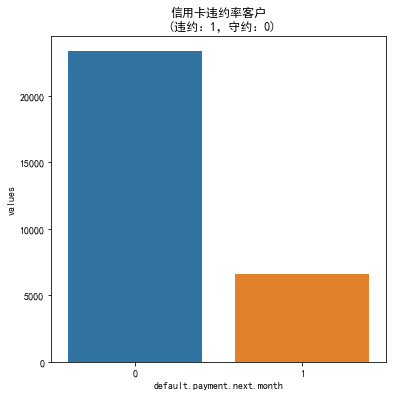

In [13]:
df = pd.DataFrame({'default.payment.next.month': next_month.index, 'values':next_month.values})
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize = (6,6))
plt.title('信用卡违约率客户\n (违约：1，守约：0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [15]:
# 特征选择，去掉ID字段、最后一个结果字段即可
data.drop('ID', inplace=True, axis=1)
target = data['default.payment.next.month'].values
columns = data.columns.to_list()
columns.remove('default.payment.next.month')
features = data[columns]

# 30%的数据作为测试集
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.3)

In [16]:
# 构造各种分类器
classifiers = [
    SVC(random_state=1, kernel='rbf'),
    DecisionTreeClassifier(random_state=1, criterion='gini'),
    RandomForestClassifier(random_state=1, criterion='gini'),
    KNeighborsClassifier(metric='minkowski')
]

# 分类器名称
classifier_names = [ 'svc', 
                    'decisiontreeclassifier', 
                    'randomforestclassifier', 
                    'kneighborsclassifier'
                   ]

# 分类器参数
classifier_param_grid = [ {'svc__C':[1], 
                           'svc__gamma':[0.01]}, 
                         {'decisiontreeclassifier__max_depth':[6,9,11]}, 
                         {'randomforestclassifier__n_estimators':[3,5,6]} , 
                         {'kneighborsclassifier__n_neighbors':[4,6,8]}
                        ]


# 对具体的分类器进行GridSearchCV参数调优
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'): 
    response = {} 
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score) 
    
    # 寻找最优的参数 和最优的准确率分数 
    search = gridsearch.fit(train_x, train_y) 
    print("GridSearch最优参数：", search.best_params_) 
    print("GridSearch最优分数： %0.4lf" %search.best_score_) 
    predict_y = gridsearch.predict(test_x) 
    print("准确率 %0.4lf" %accuracy_score(test_y, predict_y)) 
    response['predict_y'] = predict_y 
    response['accuracy_score'] = accuracy_score(test_y,predict_y) 
    
    return response

for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([ ('scaler', StandardScaler()), 
                         (model_name, model) ]) 
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

GridSearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优分数： 0.8182
准确率 0.8168
GridSearch最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch最优分数： 0.8170
准确率 0.8136
GridSearch最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch最优分数： 0.8009
准确率 0.7964
GridSearch最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch最优分数： 0.8079
准确率 0.8018
